In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import warnings to handle warnings during runtime
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import dataset
df = pd.read_csv('/Users/dell/datasets/Salary Data/Salary_Data.csv')
df.head(10)

,Experience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
df.shape

(30, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  30 non-null     float64
 1   Salary      30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

<AxesSubplot:xlabel='Experience'>

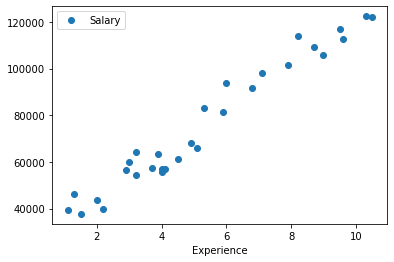

In [10]:
df.plot(x='Experience', y='Salary', style='o')

In [11]:
## train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [13]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)

-39394144.56440448

In [15]:
##prediction 
y_pred=regression.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
print(score)

0.986482673117654


<AxesSubplot:ylabel='Density'>

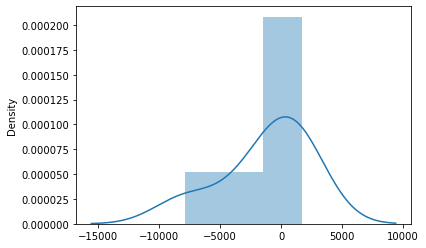

In [17]:
#sns.displot(y_pred-y_test,kind='kde')
sns.distplot(y_test-y_pred)

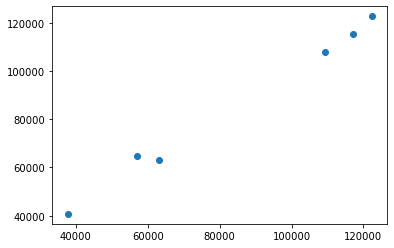

In [18]:
plt.scatter(y_test,y_pred)